![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is NOT same than men's.

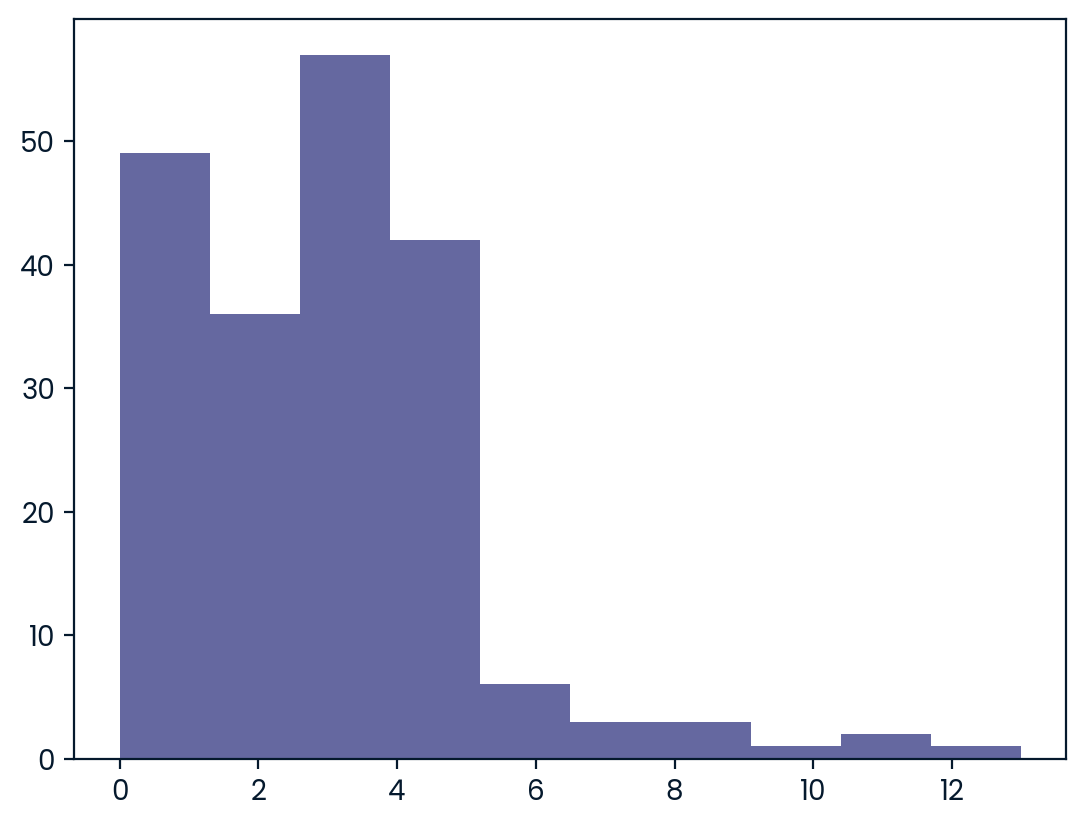

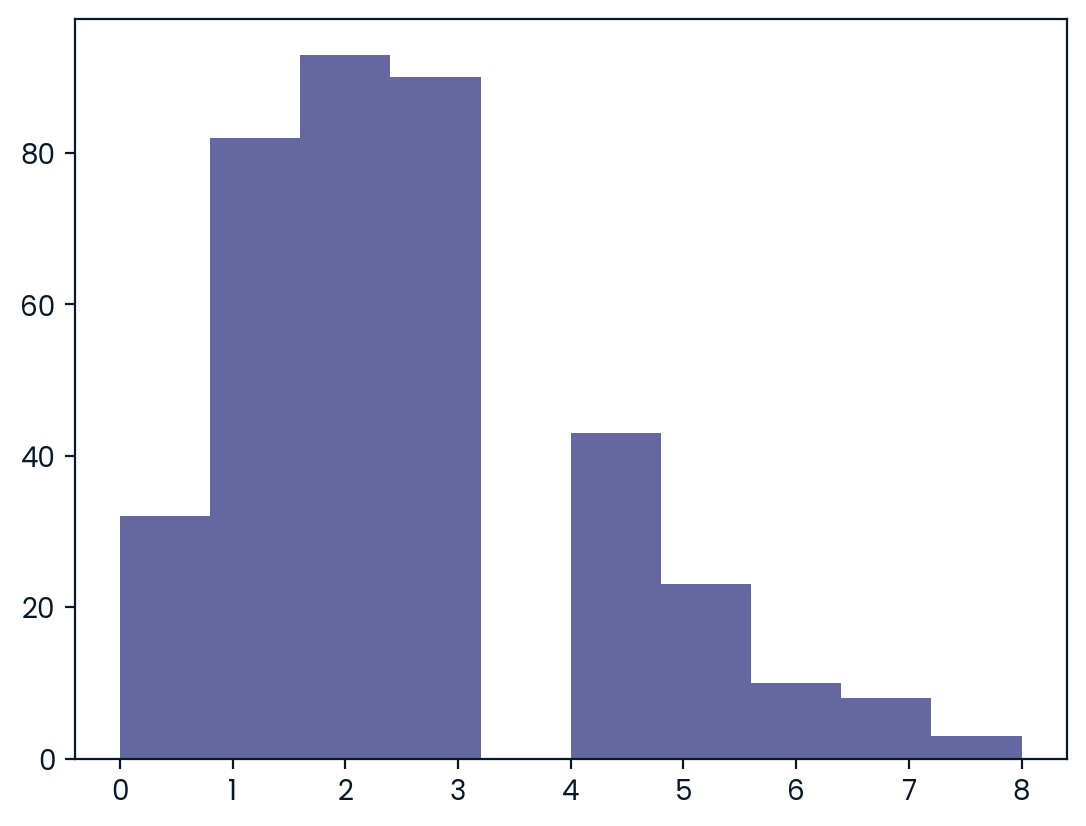

200
384
{'p_val': 0.010213219650887282, 'result': 'reject'}


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pingouin

alpha = 0.1

# Since the dataframes are already defined in the environment, we skip the CSV reading part
woman_results = pd.read_csv("women_results.csv")
condition = (woman_results['date'] > '2002-01-01') & (woman_results['tournament'] == 'FIFA World Cup')
filtered_woman_results = woman_results[condition]
filtered_woman_results['number_goals_per_game'] = filtered_woman_results['home_score'] + filtered_woman_results['away_score']
filtered_woman_results['gender'] = 'woman'

plt.hist(filtered_woman_results['number_goals_per_game'])
plt.show();

man_results = pd.read_csv("men_results.csv")
condition = (man_results['date'] > '2002-01-01') & (man_results['tournament'] == 'FIFA World Cup')
filtered_man_results = man_results[condition]
filtered_man_results['number_goals_per_game'] = filtered_man_results['home_score'] + filtered_man_results['away_score']
filtered_man_results['gender'] = 'man'
    
plt.hist(filtered_man_results['number_goals_per_game'])
plt.show();   
print(len(filtered_woman_results['number_goals_per_game']))
print(len(filtered_man_results['number_goals_per_game']))
test_results = pingouin.mwu(x=filtered_woman_results['number_goals_per_game'],
                          y=filtered_man_results['number_goals_per_game'])

p_val = test_results["p-val"].values[0]

# Determine hypothesis test result using significant level
if p_val <= alpha :
    result = "reject"
else:
    result = "fail to reject"
    
result_dict = {"p_val": p_val, "result": result}
print(result_dict)
